# Overview of Conversational Intelligence Challenge 1st Roud Dataset

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

In [5]:
with open("train_full.json") as f:
    dataset = json.load(f)

In [6]:
# dataset[50]["thread"] # print some data

## 1. Number of dialogs with more then 2 turns from each side

In [7]:
long_dialogs = 0
dialog_lens = []

for d in dataset:
    Alice = 0
    Bob = 0
    for u in d["thread"]:
        if u["userId"] == "Alice":
            Alice += 1
        elif u["userId"] == "Bob":
            Bob += 1
        else: 
            raise ValueError
    
    dialog_lens.append(Alice + Bob)
    if Alice > 2 and Bob > 2:
        long_dialogs += 1

long_dialogs

1719

## 2. Distribution of dialog lengtns measured in turns

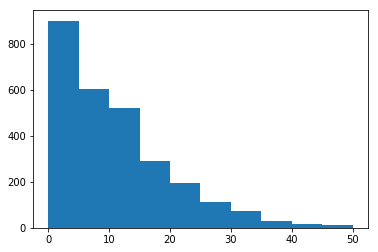

In [8]:
plot = plt.hist(dialog_lens, bins=10, range=(0,50))

In [9]:
# dataset[200] # print some data

In [10]:
human_lens = []
bot_lens = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["thread"]:
        if u["userId"] == "Alice":
            if Alice:
                human_lens.append(len(u["text"]))
            else:
                bot_lens.append(len(u["text"]))
        elif u["userId"] == "Bob":
            if Bob:
                human_lens.append(len(u["text"]))
            else:
                bot_lens.append(len(u["text"]))

## 3. Distribution of turn lengths in characters

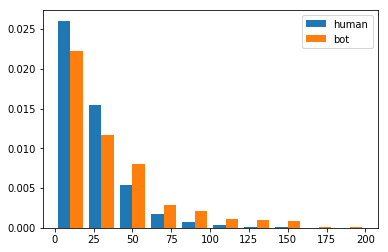

In [11]:
plot = plt.hist((human_lens,bot_lens), bins=10, normed = 1, range=(0,200), label = ('human','bot'))
l = plt.legend()

In [12]:
human_eval = []
bot_eval = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["thread"]:
        if u["userId"] == "Alice":
            if Alice:
                human_eval.append((u["evaluation"]-1))
            else:
                bot_eval.append((u["evaluation"]-1))
        elif u["userId"] == "Bob":
            if Bob:
                human_eval.append((u["evaluation"]-1))
            else:
                bot_eval.append((u["evaluation"]-1))

## 4. Distribution of turn scores (every turn is scored with {-1,0,+1})

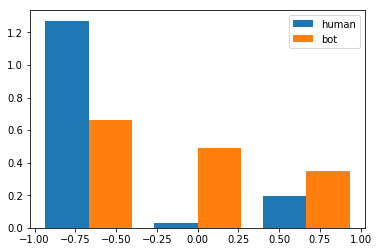

In [13]:
p = plt.hist((human_eval,bot_eval), bins=3,  normed = (1,1), label = ('human','bot'))
l = plt.legend()

In [14]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["quality"] > 0:
            if u["userId"] == "Alice":
                if Alice:
                    human_quality.append(u["quality"])
                else:
                    bot_quality.append(u["quality"])
            elif u["userId"] == "Bob":
                if Bob:
                    human_eval.append(u["quality"])
                else:
                    bot_eval.append(u["quality"])

In [15]:
# dataset[200]


## 5. Distribution of overall dialogue quality

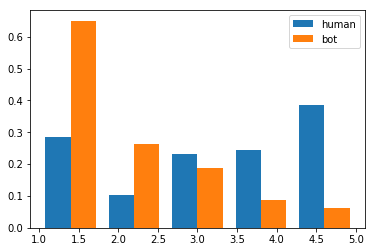

In [16]:
p = plt.hist((human_quality,bot_quality),  bins=5, normed = (1,1), label = ('human','bot'))
l = plt.legend()

In [17]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["engagement"] > 0:
            if u["userId"] == "Alice":
                if Alice:
                    human_quality.append(u["engagement"])
                else:
                    bot_quality.append(u["engagement"])
            elif u["userId"] == "Bob":
                if Bob:
                    human_eval.append(u["engagement"])
                else:
                    bot_eval.append(u["engagement"])

## 6. Distribution of engagement scores

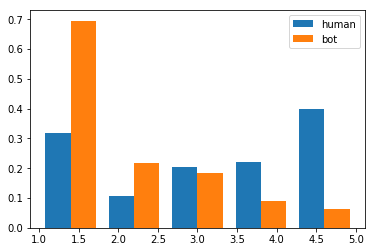

In [18]:
p = plt.hist((human_quality,bot_quality),  bins=5, normed = (1,1), label = ('human','bot'))
l = plt.legend()

In [19]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["engagement"] > 0:
            if u["userId"] == "Alice":
                if Alice:
                    human_quality.append(u["breadth"])
                else:
                    bot_quality.append(u["breadth"])
            elif u["userId"] == "Bob":
                if Bob:
                    human_eval.append(u["breadth"])
                else:
                    bot_eval.append(u["breadth"])

## 7. Distribution of breadth scores

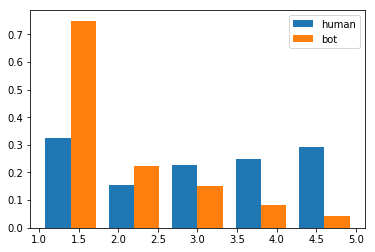

In [20]:
p = plt.hist((human_quality,bot_quality),  bins=5, normed = (1,1), label = ('human','bot'))
l = plt.legend()

# 8. Dialog reading

In [21]:
len(dataset)
dataset[:1]

[{'context': 'The decline of the city reached its nadir with the War of Spanish Succession (1702–1709) that marked the end of the political and legal independence of the Kingdom of Valencia. During the War of the Spanish Succession, Valencia sided with Charles of Austria. On 24 January 1706, Charles Mordaunt, 3rd Earl of Peterborough, 1st Earl of Monmouth, led a handful of English cavalrymen into the city after riding south from Barcelona, capturing the nearby fortress at Sagunt, and bluffing the Spanish Bourbon army into withdrawal.',
  'dialogId': -315877751,
  'evaluation': [{'breadth': 2,
    'engagement': 1,
    'quality': 4,
    'userId': 'Bob'},
   {'breadth': 1, 'engagement': 1, 'quality': 1, 'userId': 'Alice'}],
  'thread': [{'evaluation': 0,
    'text': 'Hi! As for me, I thought Spain got united much earlier',
    'userId': 'Bob'}],
  'users': [{'id': 'Alice', 'userType': 'Human'},
   {'id': 'Bob', 'userType': 'Human'}]}]

In [22]:
def print_dialog(dialog):
    print(dialog['users'])
    print("--------------")
    print(dialog['evaluation'])
    print("--------------")
    print("Context: {}".format(dialog['context']))
    print("--------------")
    for t in dialog['thread']:
        print("{}: {}".format(t['userId'], t['text']))

In [23]:
import random

In [24]:
for d in random.sample(dataset, k=10):
    print("-----{}-----".format(d['dialogId']))
    print(d)
    print_dialog(d)
    print("---------------")
    print("---------------")
    print("---------------")
    print("---------------")
    print("---------------")
    break

------2120743674-----
{'context': "INTEGRIS Health owns several hospitals, including INTEGRIS Baptist Medical Center, the INTEGRIS Cancer Institute of Oklahoma, and the INTEGRIS Southwest Medical Center. INTEGRIS Health operates hospitals, rehabilitation centers, physician clinics, mental health facilities, independent living centers and home health agencies located throughout much of Oklahoma. INTEGRIS Baptist Medical Center was named in U.S. News & World Report's 2012 list of Best Hospitals. INTEGRIS Baptist Medical Center ranks high-performing in the following categories: Cardiology and Heart Surgery; Diabetes and Endocrinology; Ear, Nose and Throat; Gastroenterology; Geriatrics; Nephrology; Orthopedics; Pulmonology and Urology.", 'users': [{'userType': 'Human', 'id': 'Bob'}, {'userType': 'Bot', 'id': 'Alice'}], 'evaluation': [{'breadth': 0, 'userId': 'Bob', 'quality': 0, 'engagement': 0}, {'breadth': 3, 'userId': 'Alice', 'quality': 3, 'engagement': 2}], 'thread': [{'evaluation': 0